In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../CommonUtils/') # https://github.com/glukicov/EDMTracking/tree/master/CommonUtils
import CommonUtils as cu
font_size=16
import matplotlib.pyplot as plt

g2period = 4.365411
font_size=14
ds_name="60h"
station=12

In [2]:
# data_hdf = pd.read_hdf("../DATA/HDF/EDM/HK.h5")   #open skimmed 
data_hdf = pd.read_hdf("../DATA/HDF/EDM/60h.h5")   #open skimmed 
# data_hdf = pd.read_hdf("../DATA/HDF/Sim/Sim.h5")   #open skimmed 

In [3]:
mom_cut = ( (data_hdf['trackMomentum'] > 1800) & (data_hdf['trackMomentum'] < 3100) ) # MeV  
time_cut =( (data_hdf['trackT0'] > 30.56) & (data_hdf['trackT0'] <450) ) # MeV  
data_hdf=data_hdf[mom_cut & time_cut]
data_hdf=data_hdf.reset_index() # reset index from 0 after cuts 
print("Total tracks after cuts", round(data_hdf.shape[0]/1e6,2), "M")

Total tracks after cuts 7.18 M


In [4]:
# calculate variables for plotting
p=data_hdf['trackMomentum']
py=data_hdf['trackMomentumY']
t=data_hdf['trackT0']
theta_y_mrad = np.arctan2(py, p)*1e3 # rad -> mrad
mod_times = cu.get_g2_mod_time(t, g2period) # Module the g-2 oscillation time 
data_hdf['mod_times']=mod_times # add to the data frame 
data_hdf['theta_y_mrad']=theta_y_mrad # add to the data frame 
data = [ data_hdf[data_hdf['station'] == 12], data_hdf[data_hdf['station'] == 18] ]
data_station=data[0]
ang=data_station['theta_y_mrad']

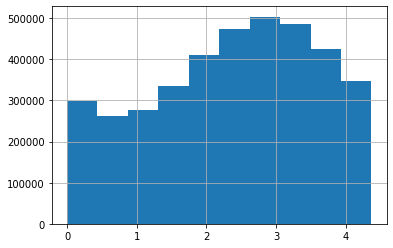

In [5]:
data_station['mod_times'].hist()

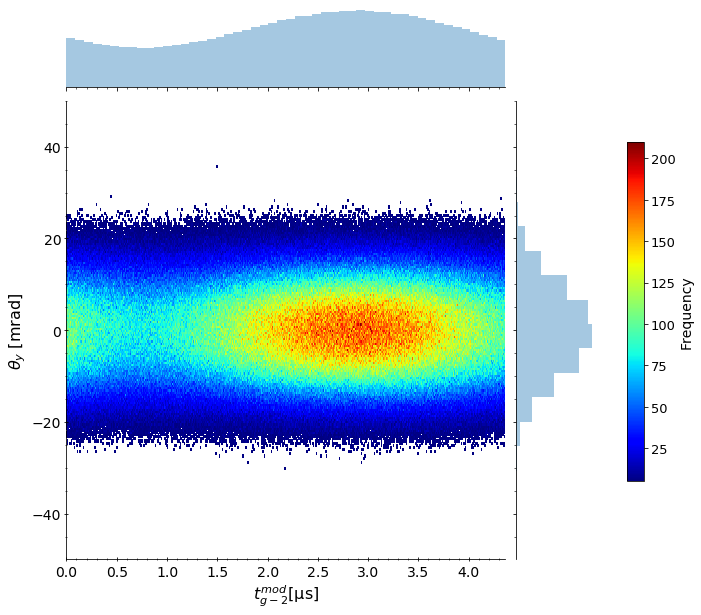

In [10]:
# fig, _ = plt.subplots()
n_binsXY_ang=(575,575)
jg, cb, legendX, legendY = cu.plotHist2D(data_station['mod_times'], ang, n_binsXY=n_binsXY_ang, prec=3, unitsXY=(r"[$\rm{\mu}$s]", "mrad"), label="S"+str(station), cmin=5 )
jg.ax_joint.set_xlim(0.0, g2period)
jg.ax_joint.set_ylim(-50, 50)
jg.ax_joint.set_ylabel(r"$\theta_y$ [mrad]", fontsize=font_size+2);
jg.ax_joint.set_xlabel(r"$t^{mod}_{g-2}$"+r"[$\rm{\mu}$s]", fontsize=font_size+2);
plt.savefig("../fig/theta2D_mod_"+ds_name+"_S"+str(station)+".png", dpi=300, bbox_inches='tight')